# EDA

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('Data/dados_finais.xlsx')
df.head(5)

,n_reuniao,data,texto,sentimento,ano,trimestre,mes,governo,selic_mes_seguinte,ano_eleitoral,...,cdi_mes_seguinte,cdi_mes_anterior,ipca_mes_anterior,ipca_mes_seguinte,desemprego_mes_anterior,desemprego_mes_seguinte,ibovespa_mes_anterior,ibovespa_mes_seguinte,pandemia,bc_autonomo
0,21,1998-01-28,Em uma reunião do Comitê de Política Monetária...,Preocupação,1998,1,1,FHC,0.117483,0,...,0.116246,0.127065,0.57,0.585,0.0,0.0,9694.095238,10204.727273,0,0
1,22,1998-03-04,O Comitê de Política Monetária (COPOM) da Repú...,Confiança,1998,1,3,FHC,0.097163,0,...,0.096459,0.114755,0.40,0.290,0.0,0.0,10389.300000,11613.478261,0,0
2,23,1998-04-15,O Comitê de Política Monetária (COPOM) decidiu...,Cautela,1998,2,4,FHC,0.083271,0,...,0.082706,0.095585,0.29,0.370,0.0,0.0,11908.142857,11422.809524,0,0
3,24,1998-05-20,O Comitê Monetário Nacional (COPOM) discute a ...,Confiança,1998,2,5,FHC,0.076660,0,...,0.076624,0.082524,0.37,0.260,0.0,0.0,11158.857143,9913.454545,0,0
4,25,1998-06-24,O Comitê de Política Monetária (COPOM) discuti...,Cautela,1998,2,6,FHC,0.074133,0,...,0.073619,0.076204,0.26,-0.050,0.0,0.0,9845.227273,10305.227273,0,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   n_reuniao                   250 non-null    int64         
 1   data                        250 non-null    datetime64[ns]
 2   texto                       250 non-null    object        
 3   sentimento                  250 non-null    object        
 4   ano                         250 non-null    int64         
 5   trimestre                   250 non-null    int64         
 6   mes                         250 non-null    int64         
 7   governo                     250 non-null    object        
 8   selic_mes_seguinte          250 non-null    float64       
 9   ano_eleitoral               250 non-null    int64         
 10  selic_mes_anterior          250 non-null    float64       
 11  cotacao_dolar_mes_anterior  250 non-null    float64       

## Resumo estatístico para colunas numéricas

In [95]:
df.describe()

,n_reuniao,data,ano,trimestre,mes,selic_mes_seguinte,ano_eleitoral,selic_mes_anterior,cotacao_dolar_mes_anterior,cotacao_dolar_mes_seguinte,cdi_mes_seguinte,cdi_mes_anterior,ipca_mes_anterior,ipca_mes_seguinte,desemprego_mes_anterior,desemprego_mes_seguinte,ibovespa_mes_anterior,ibovespa_mes_seguinte,pandemia,bc_autonomo
count,250.000000,250,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,145.500000,2010-07-08 20:44:09.600000,2010.016000,2.50400,6.520000,0.052074,0.212000,0.052124,2.928414,2.942947,0.051832,0.051862,0.501860,0.519100,7.828000,7.822280,52662.386006,53017.297602,0.092000,0.140000
min,21.000000,1998-01-28 00:00:00,1998.000000,1.00000,1.000000,0.007469,0.000000,0.007469,1.119109,1.126552,0.007469,0.007469,-0.520000,-0.325000,0.000000,0.000000,6335.363636,6346.500000,0.000000,0.000000
25%,83.250000,2003-04-30 00:00:00,2003.000000,2.00000,4.000000,0.039211,0.000000,0.039270,1.952099,1.933916,0.038842,0.038853,0.270000,0.270000,6.400000,6.325000,17043.217391,17018.681324,0.000000,0.000000
50%,145.500000,2009-09-26 12:00:00,2009.000000,2.50000,6.500000,0.050743,0.000000,0.050788,2.466117,2.483036,0.050629,0.050711,0.462500,0.490000,8.400000,8.400000,51193.022727,50646.751976,0.000000,0.000000
75%,207.750000,2017-07-12 00:00:00,2017.000000,3.75000,9.750000,0.066749,0.000000,0.066735,3.646158,3.714993,0.066594,0.066456,0.680000,0.683750,11.600000,11.575000,69974.352273,70699.055195,0.000000,0.000000
max,270.000000,2025-05-07 00:00:00,2025.000000,4.00000,12.000000,0.144515,1.000000,0.139918,6.051495,6.123352,0.142373,0.137795,2.560000,2.560000,14.900000,14.900000,135441.478261,137970.111111,1.000000,1.000000
std,72.312977,NaN,8.084378,1.12027,3.427036,0.023253,0.409545,0.023253,1.273747,1.278337,0.023068,0.023034,0.377244,0.382862,4.501844,4.491678,36888.263260,37048.704672,0.289606,0.347683


## Verificando valores faltantes

In [96]:
df.isnull().sum()

n_reuniao                     0
data                          0
texto                         0
sentimento                    0
ano                           0
trimestre                     0
mes                           0
governo                       0
selic_mes_seguinte            0
ano_eleitoral                 0
selic_mes_anterior            0
cotacao_dolar_mes_anterior    0
cotacao_dolar_mes_seguinte    0
cdi_mes_seguinte              0
cdi_mes_anterior              0
ipca_mes_anterior             0
ipca_mes_seguinte             0
desemprego_mes_anterior       0
desemprego_mes_seguinte       0
ibovespa_mes_anterior         0
ibovespa_mes_seguinte         0
pandemia                      0
bc_autonomo                   0
dtype: int64

## Convertendo Taxa Selic Diária em Mensal

In [97]:
df['selic_mes_seguinte_am'] = df['selic_mes_seguinte'].apply(lambda x: ((1+(x/100))**252)-1)
df['selic_mes_seguinte_am']

0      0.344314
1      0.277279
2      0.233377
3      0.213014
4      0.205320
         ...   
245    0.111260
246    0.121021
247    0.131062
248    0.141044
249    0.146282
Name: selic_mes_seguinte_am, Length: 250, dtype: float64

In [98]:
df['selic_mes_anterior_am'] = df['selic_mes_anterior'].apply(lambda x: ((1+(x/100))**252)-1)
df['selic_mes_anterior_am']

0      0.379291
1      0.341375
2      0.273951
3      0.231336
4      0.211953
         ...   
245    0.106501
246    0.111499
247    0.121500
248    0.131499
249    0.141500
Name: selic_mes_anterior_am, Length: 250, dtype: float64

## Convertendo CDI Diário em Mensal

In [99]:
df['cdi_mes_seguinte_am'] = df['cdi_mes_seguinte'].apply(lambda x: ((1+(x/100))**252)-1)
df['cdi_mes_seguinte_am']

0      0.340134
1      0.275017
2      0.231623
3      0.212905
4      0.203761
         ...   
245    0.111260
246    0.121021
247    0.131062
248    0.141044
249    0.146282
Name: cdi_mes_seguinte_am, Length: 250, dtype: float64

In [100]:
df['cdi_mes_anterior_am'] = df['cdi_mes_anterior'].apply(lambda x: ((1+(x/100))**252)-1)
df['cdi_mes_anterior_am']

0      0.377129
1      0.335116
2      0.272215
3      0.231059
4      0.211624
         ...   
245    0.106501
246    0.111499
247    0.121500
248    0.131499
249    0.141500
Name: cdi_mes_anterior_am, Length: 250, dtype: float64

## Histograma

In [101]:
df.columns

Index(['n_reuniao', 'data', 'texto', 'sentimento', 'ano', 'trimestre', 'mes',
       'governo', 'selic_mes_seguinte', 'ano_eleitoral', 'selic_mes_anterior',
       'cotacao_dolar_mes_anterior', 'cotacao_dolar_mes_seguinte',
       'cdi_mes_seguinte', 'cdi_mes_anterior', 'ipca_mes_anterior',
       'ipca_mes_seguinte', 'desemprego_mes_anterior',
       'desemprego_mes_seguinte', 'ibovespa_mes_anterior',
       'ibovespa_mes_seguinte', 'pandemia', 'bc_autonomo',
       'selic_mes_seguinte_am', 'selic_mes_anterior_am', 'cdi_mes_seguinte_am',
       'cdi_mes_anterior_am'],
      dtype='object')

In [102]:
colunas_histograma = ['ano', 'mes', 'selic_mes_seguinte_am', 'selic_mes_anterior_am', 'cotacao_dolar_mes_anterior', 'cotacao_dolar_mes_seguinte', 'cdi_mes_anterior_am', 'cdi_mes_seguinte_am', 'ipca_mes_anterior', 'ipca_mes_seguinte', 'desemprego_mes_anterior', 'desemprego_mes_seguinte', 'ibovespa_mes_anterior', 'ibovespa_mes_seguinte']

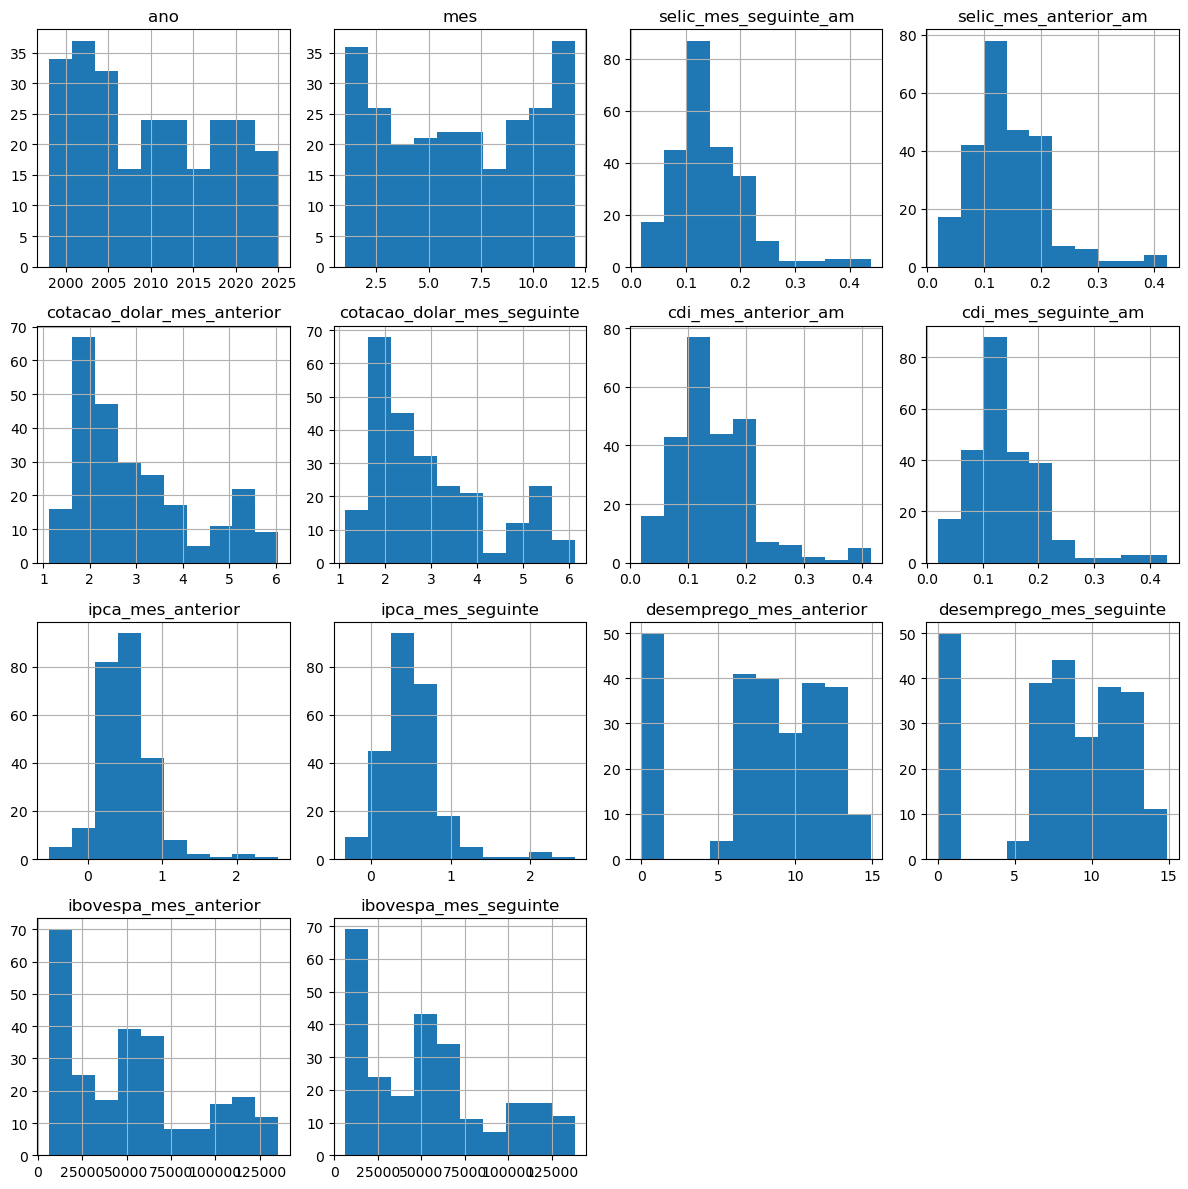

In [103]:
df[colunas_histograma].hist(figsize=(12, 12))
plt.tight_layout()
plt.show()

## Verificando Outliers

In [104]:
colunas_numericas = colunas_histograma
colunas_numericas.remove('ano')
colunas_numericas.remove('mes')

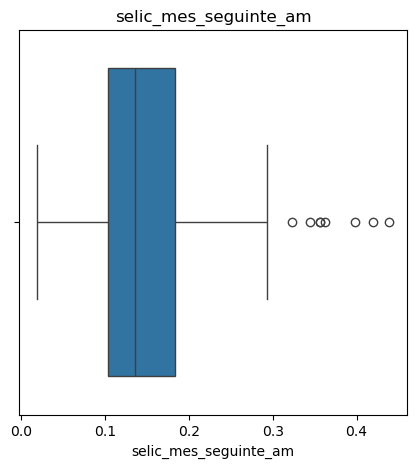

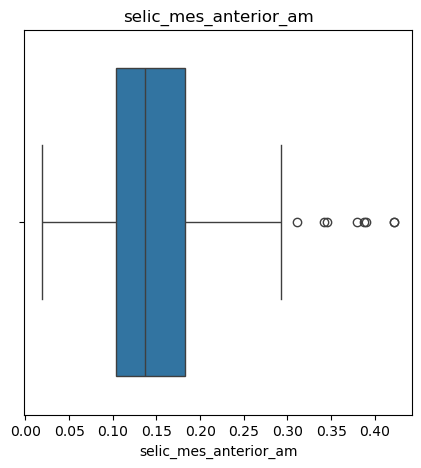

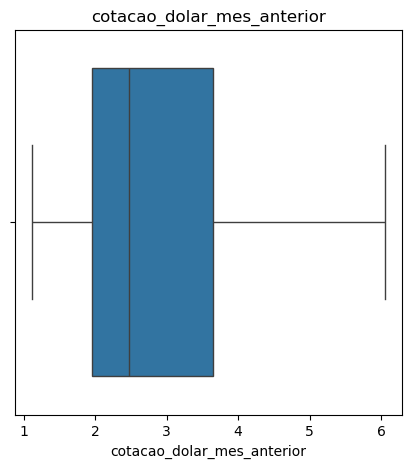

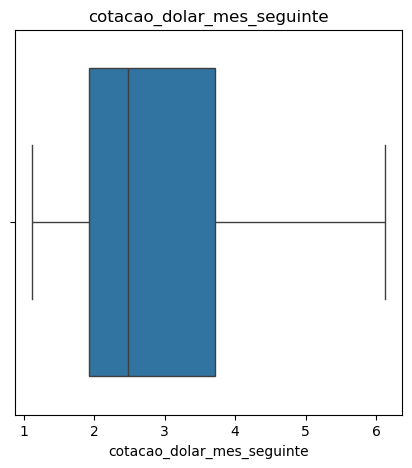

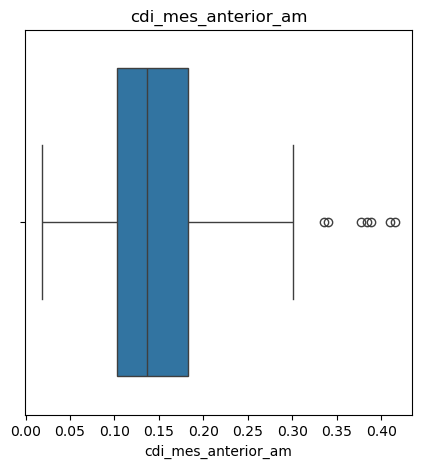

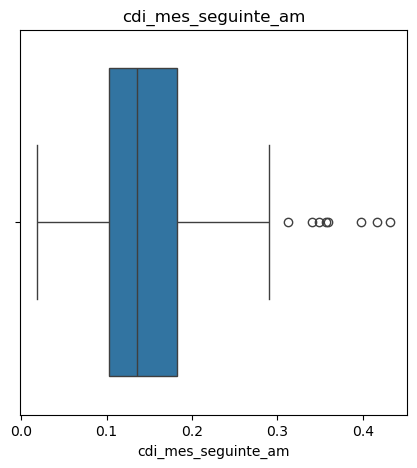

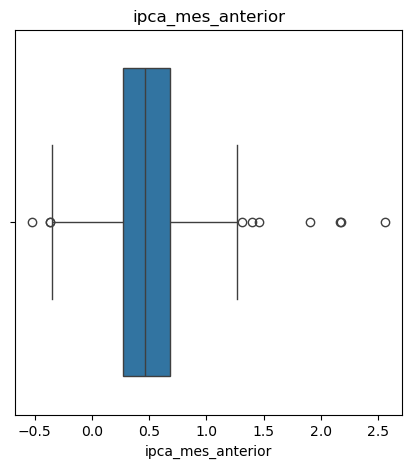

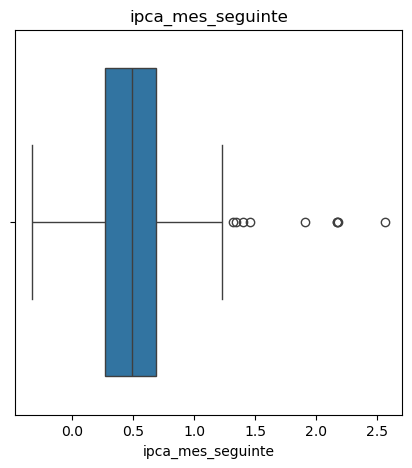

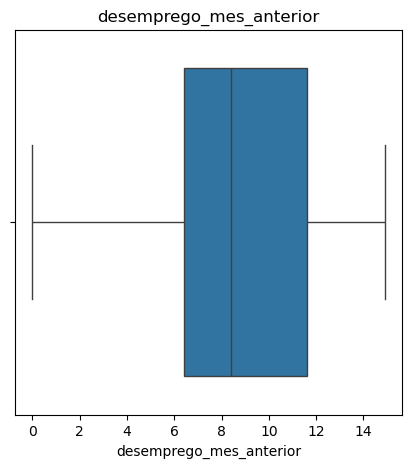

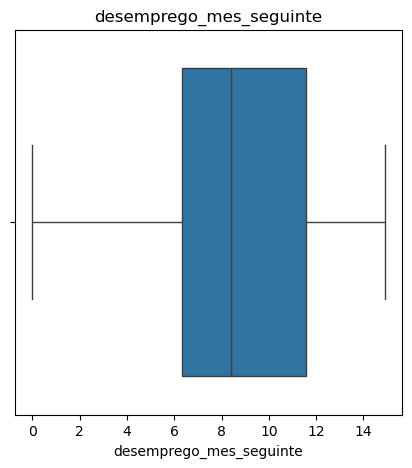

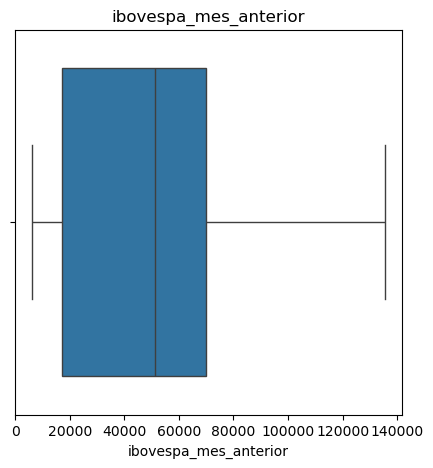

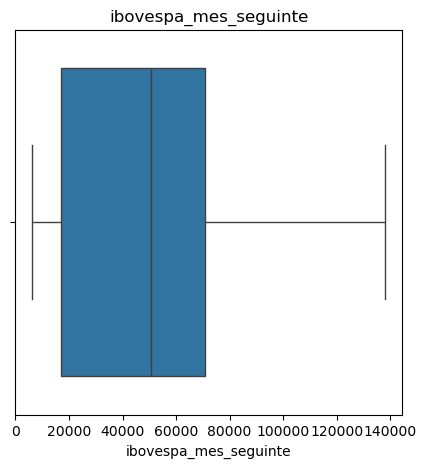

In [105]:
for column in df[colunas_numericas].select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()

## Séries Temporais

### Selic

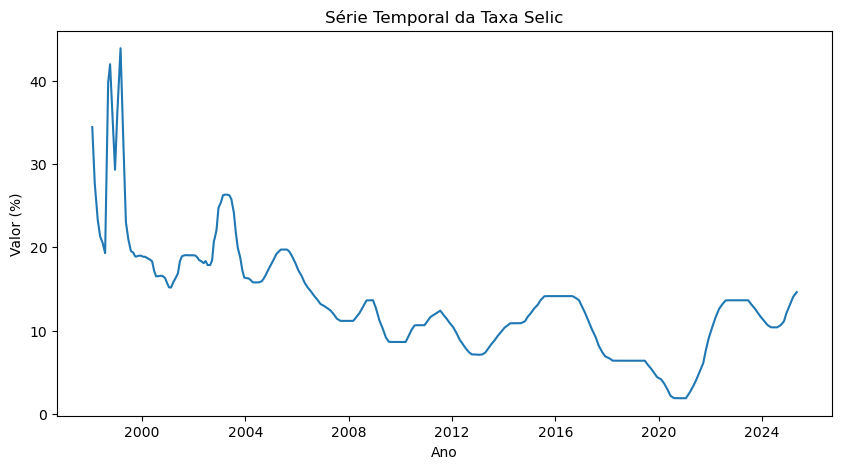

In [106]:
plt.figure(figsize=(10, 5))
plt.plot(df['data'], df['selic_mes_seguinte_am']*100)
plt.title('Série Temporal da Taxa Selic')
plt.xlabel('Ano')
plt.ylabel('Valor (%)')
plt.show()

### CDI

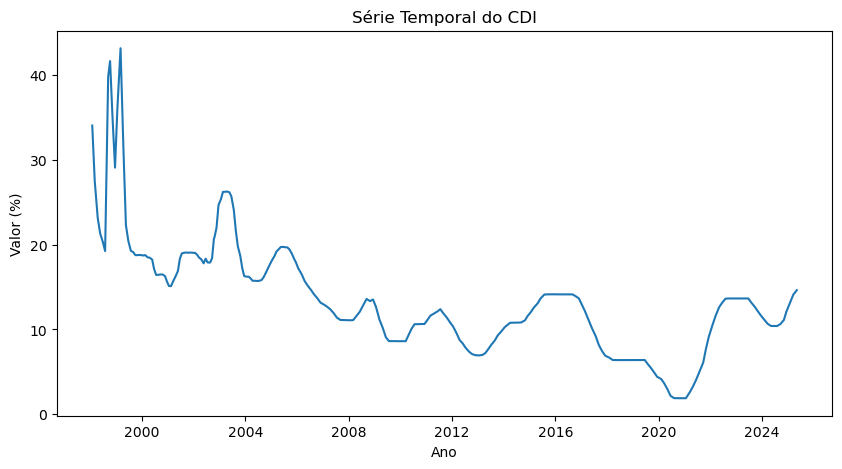

In [107]:
plt.figure(figsize=(10, 5))
plt.plot(df['data'], df['cdi_mes_seguinte_am']*100)
plt.title('Série Temporal do CDI')
plt.xlabel('Ano')
plt.ylabel('Valor (%)')
plt.show()

### Dólar

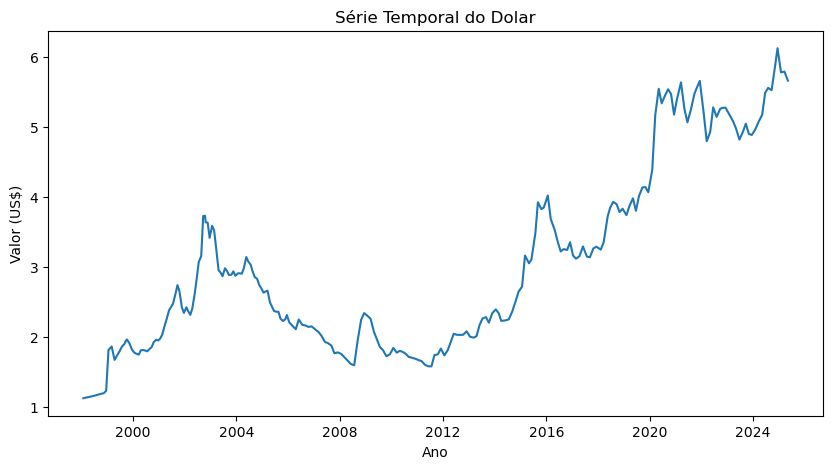

In [108]:
plt.figure(figsize=(10, 5))
plt.plot(df['data'], df['cotacao_dolar_mes_seguinte'])
plt.title('Série Temporal do Dolar')
plt.xlabel('Ano')
plt.ylabel('Valor (US$)')
plt.show()

### IPCA

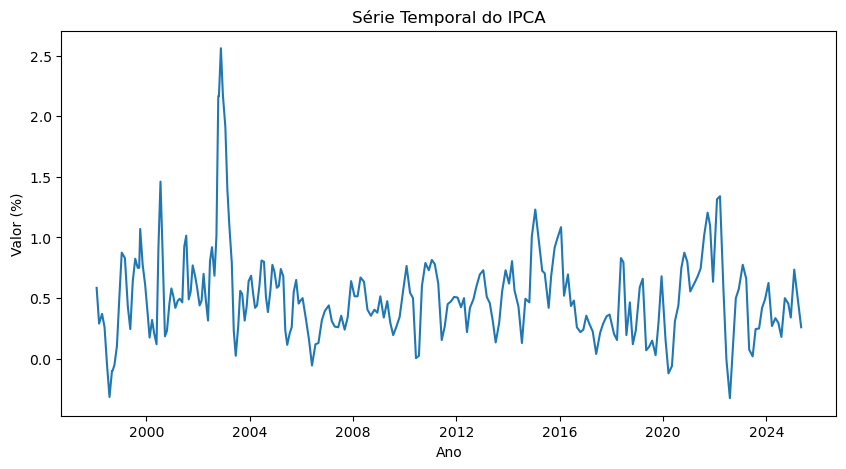

In [109]:
plt.figure(figsize=(10, 5))
plt.plot(df['data'], df['ipca_mes_seguinte'])
plt.title('Série Temporal do IPCA')
plt.xlabel('Ano')
plt.ylabel('Valor (%)')
plt.show()

### Ibovespa

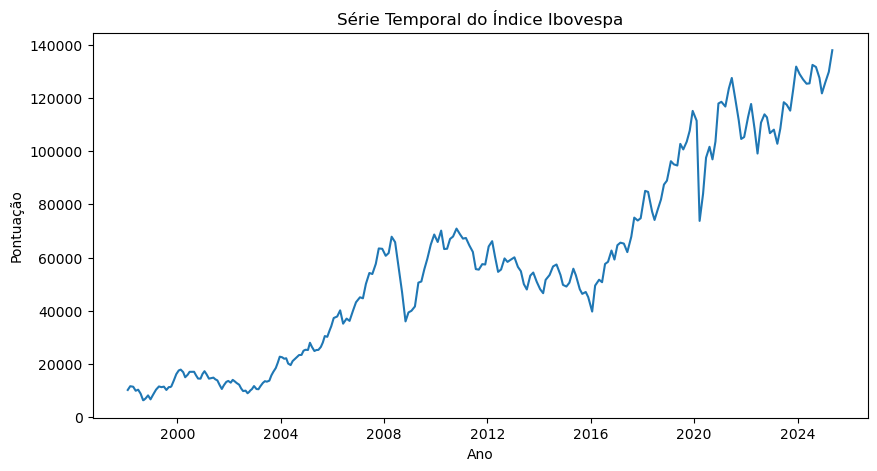

In [110]:
plt.figure(figsize=(10, 5))
plt.plot(df['data'], df['ibovespa_mes_seguinte'])
plt.title('Série Temporal do Índice Ibovespa')
plt.xlabel('Ano')
plt.ylabel('Pontuação')
plt.show()

### Desemprego

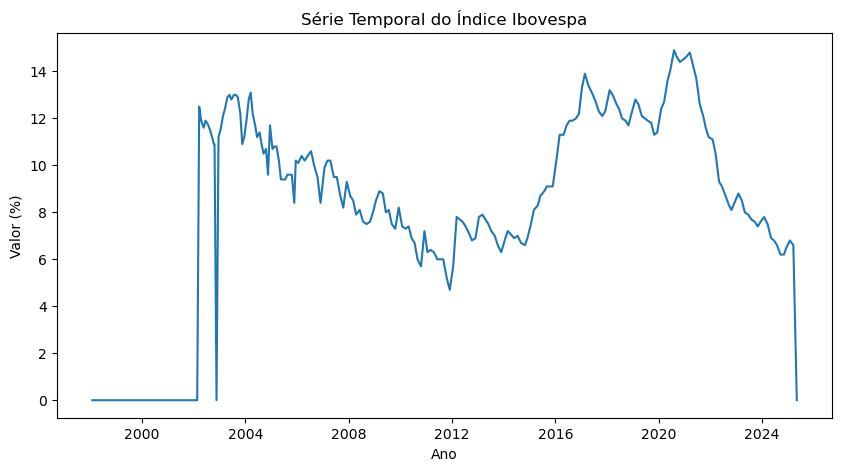

In [111]:
plt.figure(figsize=(10, 5))
plt.plot(df['data'], df['desemprego_mes_seguinte'])
plt.title('Série Temporal do Índice Ibovespa')
plt.xlabel('Ano')
plt.ylabel('Valor (%)')
plt.show()